# Notebook - Error Analysis

In [59]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Parameter Setup

In [60]:
model_no = 0

### Load Dataset

In [61]:
validation_record = pd.read_parquet('../src/model_save/version-nbroad/ESG-BERT-'+ str(model_no) +'/validation_predicts.parquet')
# === get the last epoch
validation_record = validation_record.loc[validation_record['epoch'] == max(validation_record['epoch'].to_list())]
validation_record["predict_result"] = validation_record["predict_result"].apply(lambda x: x.tolist().index(max(x.tolist())))

### Evaluation Metrics & Confusion Matrix

In [62]:
# Computation of metrics
print("Accuracy: ", accuracy_score(validation_record["label"].tolist(), validation_record["predict_result"].tolist()))
print("Precision Score: ", precision_score(validation_record["label"].tolist(), validation_record["predict_result"].tolist(),average='weighted'))
print("Recall Score: ", recall_score(validation_record["label"].tolist(), validation_record["predict_result"].tolist(),average='weighted'))
print("f1 Score: ", f1_score(validation_record["label"].tolist(), validation_record["predict_result"].tolist(),average='weighted'))

Accuracy:  0.5549273021001615
Precision Score:  0.5273665264092252
Recall Score:  0.5549273021001615
f1 Score:  0.534995257094768


Text(0.5, 1.0, 'Confusion Matrix')

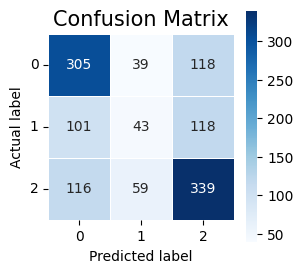

In [63]:
cm = confusion_matrix(validation_record["label"].tolist(), validation_record["predict_result"].tolist())
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="0", linewidths=.5,square = True, cmap = "Blues");
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.xticks(ticks=np.arange(3) + 0.5, rotation=0)
plt.yticks(ticks=np.arange(3) + 0.5, rotation=0)
all_sample_title = "Confusion Matrix"
plt.title(all_sample_title, size = 15)

### Groupby Language and Labels

In [64]:
validation_record["accurate_count"] = validation_record["predict_result"] - validation_record["label"]
validation_record["accurate_count"] = validation_record["accurate_count"].apply(lambda x: 1 if x == 0 else 0)

In [65]:
group_label = validation_record.groupby(["language","label"]).agg({"sentence":"sum","accurate_count":"sum","epoch":"first","predict_result":"count"})
group_label["Accuracy"] = group_label["accurate_count"] / group_label["predict_result"]

In [66]:
group_label

sentence  accurate_count  epoch  predict_result  Accuracy
language label                                                                                                    
Chinese  0      Jeans king Ru Xing is in a major crisis! Eveni...              25     14              50  0.500000
         1      "The semiconductor industry is like the centra...               7     14              70  0.100000
         2      Cathay Capital Holdings, Taiwan's Top Financia...             158     14             221  0.714932
English  0      Bank of America CEO: Sustainable Finance Deman...               6     14              14  0.428571
         1      Methane Emissions Detection Platform Kuva Rais...              17     14              47  0.361702
         2      Methane Emissions Detection Platform Kuva Rais...              25     14              51  0.490196
French   0      France plans a pipeline to transport green hyd...               7     14              19  0.368421
         1      Renewable energies bill: heat is the big omiss...               7     14              39  0.179487
         2      Extending nuclear power plants in the face of ...              41     14              53  0.773585
Korean   0      International carbon credit prices hit record ...             267     14             379  0.704485
         1      Protecting the Colorado River, the lifeblood o...              12     14             106  0.113208
         2      Morgan Stanley, "$50 trillion investment neede...             115     14             189  0.608466

### Check error records

In [67]:
language_lst = list(set(validation_record["language"].tolist()))
label_lst = list(set(validation_record["label"].tolist()))

In [68]:
for lan in language_lst:
    for lab in label_lst:
        temp_df = validation_record[validation_record["language"] == lan]
        temp_df = temp_df[temp_df["label"] == lab]
        temp_df = temp_df[temp_df["accurate_count"] == 0]
        print("===== Error Classification Records =====\nLanguage: ", lan, "\nLabel: ", lab)
        display(temp_df.head(5))
        

===== Error Classification Records =====
Language:  English 
Label:  0


,sentence,label,predict_result,epoch,language,accurate_count
25,Fed Launches Climate Risk Exercise for Big Ban...,0,2,14,English,0
87,Chipotle Ties Exec Compensation to Sustainabil...,0,2,14,English,0
4,Pfizer to Offer Full Portfolio of Medicines to...,0,2,14,English,0
7,Starbucks Targets Waste Reduction in Trial for...,0,1,14,English,0
9,Lilly Announces ESG Goals and Transparency Com...,0,1,14,English,0


===== Error Classification Records =====
Language:  English 
Label:  1


,sentence,label,predict_result,epoch,language,accurate_count
16,Methane Emissions Detection Platform Kuva Rais...,1,2,14,English,0
17,"Carlyle, Schneider Electric JV to Provide Mass...",1,0,14,English,0
19,"Carlyle, Schneider Electric JV to Provide Mass...",1,0,14,English,0
27,Henkel Sources Renewable Ingredients to Replac...,1,2,14,English,0
28,Henkel Sources Renewable Ingredients to Replac...,1,2,14,English,0


===== Error Classification Records =====
Language:  English 
Label:  2


,sentence,label,predict_result,epoch,language,accurate_count
18,"Carlyle, Schneider Electric JV to Provide Mass...",2,0,14,English,0
22,responsAbility Raises $274 Million for Sustain...,2,1,14,English,0
37,EU Unveils Rules Requiring all Packaging to be...,2,1,14,English,0
38,Canada Moves to Eliminate Single Use Plastics ...,2,1,14,English,0
42,Fitch Group to Increase Representation of Wome...,2,1,14,English,0


===== Error Classification Records =====
Language:  Chinese 
Label:  0


,sentence,label,predict_result,epoch,language,accurate_count
7,Jeans king Ru Xing is in a major crisis! Eveni...,0,1,14,Chinese,0
34,Food and beverage coupons are waiting for you!...,0,2,14,Chinese,0
36,Food and beverage coupons are waiting for you!...,0,2,14,Chinese,0
37,Food and beverage coupons are waiting for you!...,0,2,14,Chinese,0
38,Food and beverage coupons are waiting for you!...,0,2,14,Chinese,0


===== Error Classification Records =====
Language:  Chinese 
Label:  1


,sentence,label,predict_result,epoch,language,accurate_count
27,"""The semiconductor industry is like the centra...",1,0,14,Chinese,0
29,"""The semiconductor industry is like the centra...",1,0,14,Chinese,0
30,"""The semiconductor industry is like the centra...",1,0,14,Chinese,0
31,"""The semiconductor industry is like the centra...",1,0,14,Chinese,0
39,Pushing for ultra-concentration and supplement...,1,2,14,Chinese,0


===== Error Classification Records =====
Language:  Chinese 
Label:  2


,sentence,label,predict_result,epoch,language,accurate_count
3,"Cathay Capital Holdings, Taiwan's Top Financia...",2,0,14,Chinese,0
4,"Cathay Capital Holdings, Taiwan's Top Financia...",2,0,14,Chinese,0
8,"Zhang Rongfa's favorite four sons, 24 billion ...",2,0,14,Chinese,0
9,"Zhang Rongfa's favorite four sons, 24 billion ...",2,0,14,Chinese,0
10,"Zhang Rongfa's favorite four sons, 24 billion ...",2,0,14,Chinese,0


===== Error Classification Records =====
Language:  French 
Label:  0


,sentence,label,predict_result,epoch,language,accurate_count
40,France plans a pipeline to transport green hyd...,0,2,14,French,0
53,"""Patrick's pipeline"" scrutinizes progress on t...",0,2,14,French,0
54,"""Patrick's pipeline"" scrutinizes progress on t...",0,1,14,French,0
63,"Austria, Germany... ""climate tickets"" for trai...",0,2,14,French,0
80,RATP buses on fire: Should we be concerned abo...,0,2,14,French,0


===== Error Classification Records =====
Language:  French 
Label:  1


,sentence,label,predict_result,epoch,language,accurate_count
32,Renewable energies bill: heat is the big omiss...,1,2,14,French,0
33,Renewable energies bill: heat is the big omiss...,1,2,14,French,0
34,France plans a pipeline to transport green hyd...,1,2,14,French,0
35,France plans a pipeline to transport green hyd...,1,2,14,French,0
36,France plans a pipeline to transport green hyd...,1,2,14,French,0


===== Error Classification Records =====
Language:  French 
Label:  2


,sentence,label,predict_result,epoch,language,accurate_count
41,France's lag in renewable energies to cost sev...,2,1,14,French,0
67,EU energy summit: why a liquefied natural gas ...,2,1,14,French,0
77,RATP buses on fire: Should we be concerned abo...,2,0,14,French,0
78,RATP buses on fire: Should we be concerned abo...,2,0,14,French,0
79,RATP buses on fire: Should we be concerned abo...,2,0,14,French,0


===== Error Classification Records =====
Language:  Korean 
Label:  0


,sentence,label,predict_result,epoch,language,accurate_count
82,KB Financial to link ESG and financial informa...,0,1,14,Korean,0
87,KB Financial to link ESG and financial informa...,0,1,14,Korean,0
88,KB Financial to link ESG and financial informa...,0,1,14,Korean,0
95,Net-Zero Investment Alliance (NZAIO) recommend...,0,2,14,Korean,0
96,Net-Zero Investment Alliance (NZAIO) recommend...,0,2,14,Korean,0


===== Error Classification Records =====
Language:  Korean 
Label:  1


,sentence,label,predict_result,epoch,language,accurate_count
46,"Protecting the Colorado River, the lifeblood o...",1,2,14,Korean,0
47,"Protecting the Colorado River, the lifeblood o...",1,2,14,Korean,0
48,"Protecting the Colorado River, the lifeblood o...",1,2,14,Korean,0
49,"Protecting the Colorado River, the lifeblood o...",1,2,14,Korean,0
50,"US National Security Advisor Says ""IRA Critica...",1,0,14,Korean,0


===== Error Classification Records =====
Language:  Korean 
Label:  2


,sentence,label,predict_result,epoch,language,accurate_count
56,"Morgan Stanley, ""$50 trillion investment neede...",2,0,14,Korean,0
57,"Morgan Stanley, ""$50 trillion investment neede...",2,0,14,Korean,0
59,Korea Horse Racing Association Chairman Kim Wo...,2,0,14,Korean,0
60,Korea Horse Racing Association Chairman Kim Wo...,2,0,14,Korean,0
61,Korea Horse Racing Association Chairman Kim Wo...,2,0,14,Korean,0
